### make_mockobs_forpaper

Script that runs the making mock observations scripts and output specifically to put in the paper


In [44]:
%run 'make_mockobs.ipynb'

In [2]:
machine='chinook'

In [33]:
resolution = None;  # This should prompt the script to just use the lowest resolution 

slicewidth = 20; 
exptime = 1000.*60.*60.; 
CMOS = True; ROnoise= None; 

x_center = 50.5; y_center = 13.5

x_center = 47.5; y_center = 12.0


****** Working on mock observation for distance 100Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
DEBUG: the resolution outputted from load_data is 6.40094057981
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-2.4253029823303223 -2.3983266353607178 -2.3699655532836914 ...,
  -1.4685169458389282 -1.4777671098709106 -1.4864619970321655]
 [-2.424239158630371 -2.397662878036499 -2.3695712089538574 ...,
  -1.4707368612289429 -1.479714035987854 -1.4881374835968018]
 [-2.4230761528015137 -2.3969814777374268 -2.3692305088043213 ...,
  -1.4733139276504517 -1.4820384979248047 -1.490221381187439]
 ..., 
 [-2.3982462882995605 -2.3935086727142334 -2.3873214721679688 ...,
  -1.591041088104248 -1.5775458812713623 -1.5694676637649536]
 [-2.4051859378814697 -2.4006502628326416 -2.394634962081909 ...,
  -1.523939609527588 -1.5116016864776611 -1.5050709247589111]
 [-2.4119129180908203 -2.4074807167053223 -2.401546001434326 ...,
  -1.4672629833221436 -1.4566993713378906 -1.452203631401062]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 6.40094057981
D

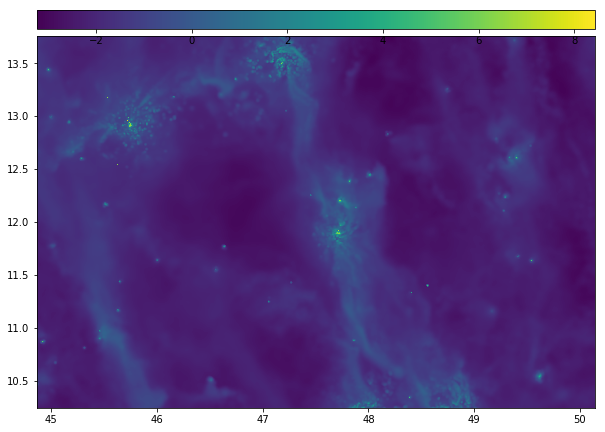

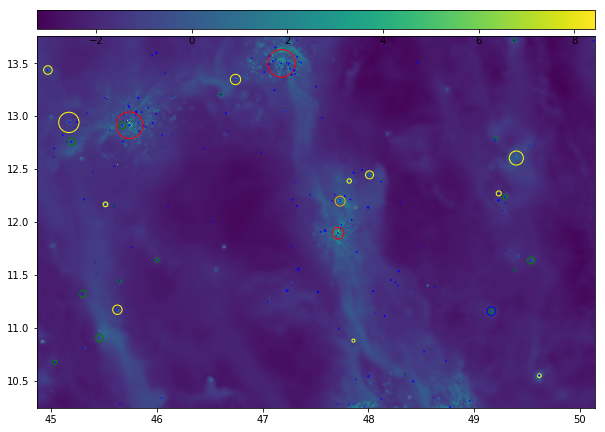

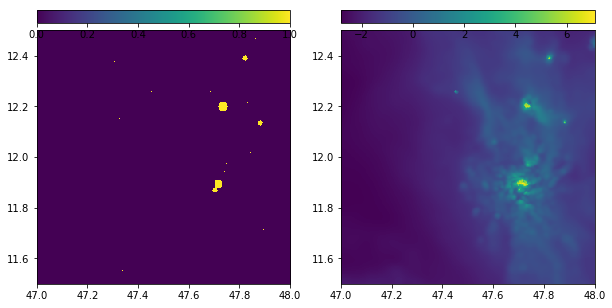

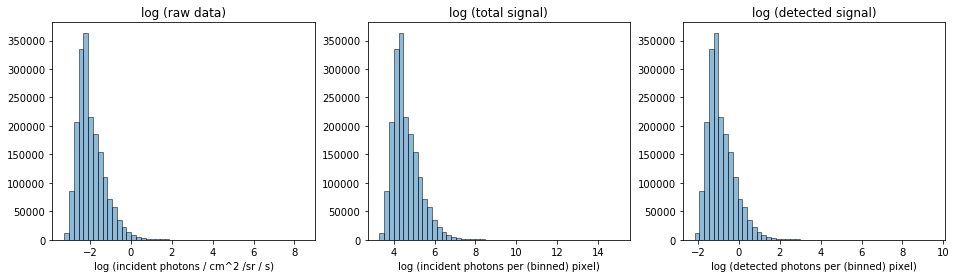

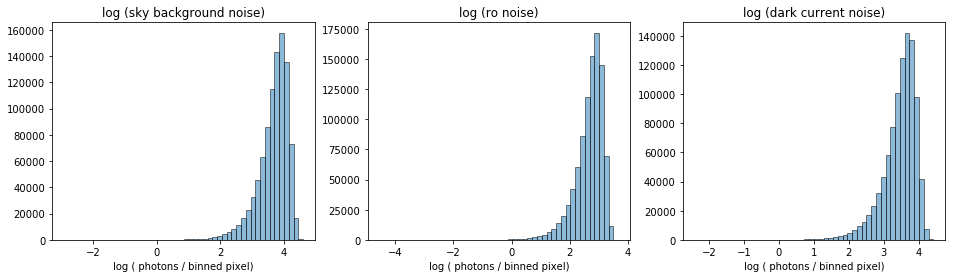

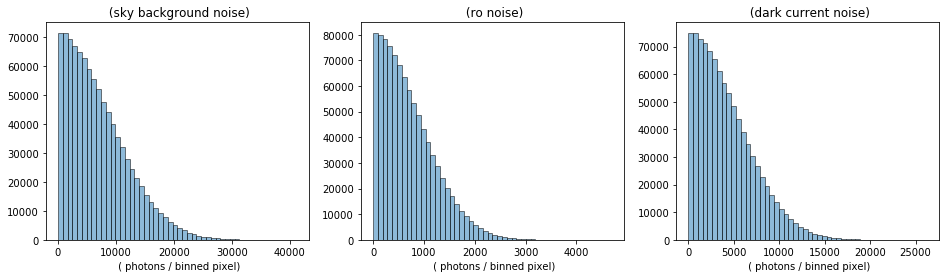

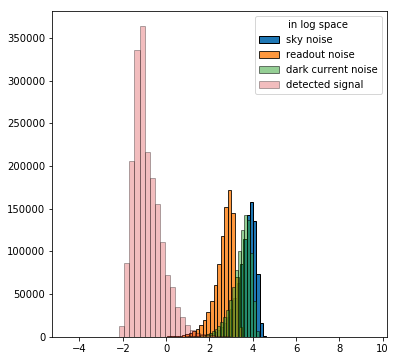

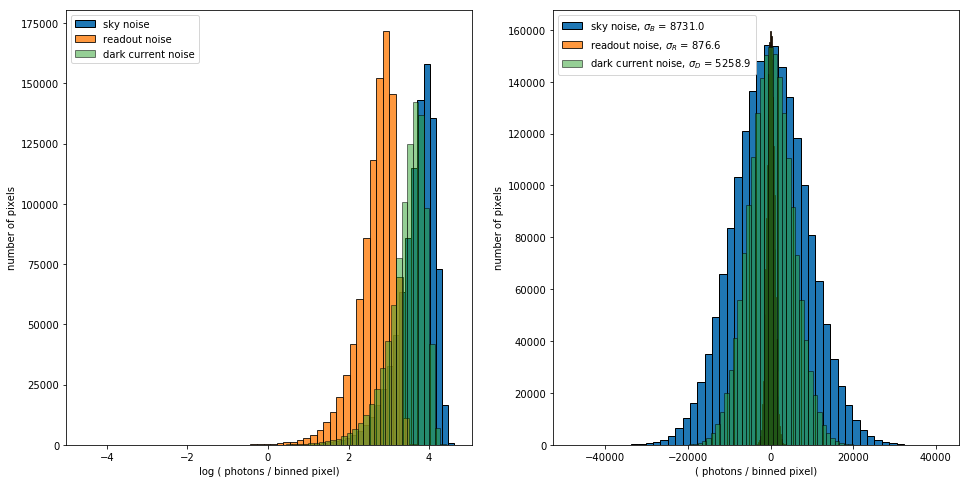

In [45]:
#distance = '500Mpc'
#stuff_500 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,\
#                          x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)
#data_FOV_500, xystarts_500, size_500, noiseadded_signal_500, B_sky_array_500, R_array_500,D_array500,mask_500 = stuff_500#
#
#distance = '200Mpc'
#stuff_200 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,\
#                          x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)
#data_FOV_200, xystarts_200, size_200, noiseadded_signal_200, B_sky_array_200, R_array_200,D_array200,mask_200 = stuff_200

distance = '100Mpc'
stuff_100 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,\
                          x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)
data_FOV_100, xystarts_100, size_100, noiseadded_signal_100, B_sky_array_100, R_array_100,D_array100, mask_100 = stuff_100

#distance = '50Mpc'
#stuff_50 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,\
#                         x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)
#data_FOV_50, xystarts_50, size_50, noiseadded_signal_50, B_sky_array_50, R_array_50,D_array50,mask_50 = stuff_50

### checking that the masking is done correctly, since the image of the mask above got warped weirdly
... and it's all good -- just warping of the image makes the mask look non-circular and weird.

(80, 80)
[[False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False  True False
  False False False False False False Fals

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


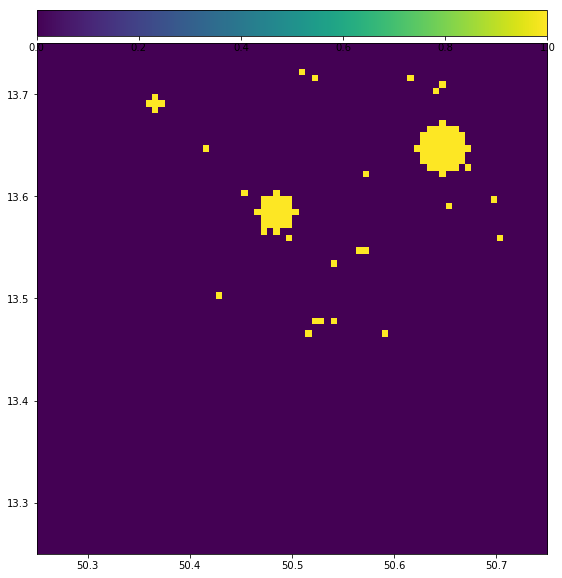

In [31]:
def pltcutout2(data_FOV,xystarts,size,ax=None):
    xpixsize,ypixsize = data_FOV.shape
    xlength,ylength = size
    midx=xpixsize/2; midy=ypixsize/2
    boxlength = 0.5 #Mpc
    pixsizex=xpixsize/xlength*boxlength
    data_cutout = data_FOV[midx-pixsizex/2:midx+pixsizex/2,midy-pixsizex/2:midy+pixsizex/2]
        
    xystarts_x = xystarts[0] + (midx-pixsizex/2)/(xpixsize/xlength)
    xystarts_y = xystarts[1] + (midy-pixsizex/2)/(ypixsize/ylength)
    size_new = [boxlength,boxlength]

    pltimg(data_cutout,[xystarts_x,xystarts_y],size_new,ax=ax)
    return data_cutout

fig, (ax) = plt.subplots(1, 1, figsize=(10, 10))
data_cutout = pltcutout2(mask_500,xystarts_500,size_500,ax=ax)
print data_cutout.shape
print data_cutout[10:20,60:80]
print data_cutout[70:80,10:20]

In [47]:
def clippeddata(lowres,mask=False):
    print ""
    print "standard deviation: %s"%np.std(lowres)
    print "standard deviation*0.005: %s"%(np.std(lowres)*0.005)
    print "min value: %s"%np.min(lowres)
    median = np.median(lowres)
    print "median: %s"%median
    
    sig = np.sqrt(np.abs(median))  # kind of works because for Poisson -> Gaussian, sigma is sqrt of mean ~ median
    print "sqrt of the median (sig) is: %s"%np.sqrt(median)
    
    mymax = median + 40*sig
    mymin = median - sig
    
    clipped = lowres + 0
    clipped[clipped < mymin]=0 #mymin 
    clipped[clipped > mymax]=mymax

    return np.log10(clipped)

In [48]:
mx_simulation = np.ma.masked_array(data_FOV_100, mask=mask_100)
mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask_100)

rawsim_cutout = data_FOV_100[800:1000,500:700]
rawsimmasked_cutout = mx_simulation[800:1000,500:700]

noise_cutout = noiseadded_signal_100[800:1000,500:700]
noisemasked_cutout = mx_noisy[800:1000,500:700]

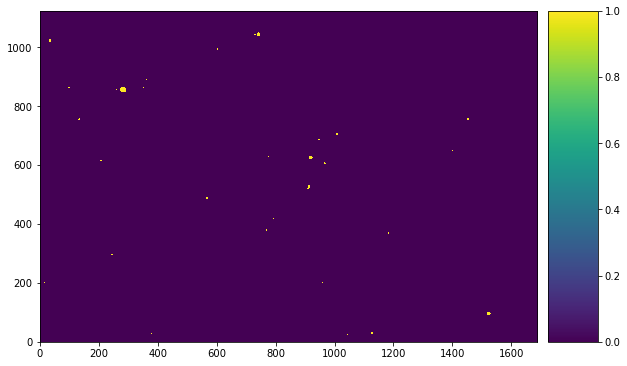

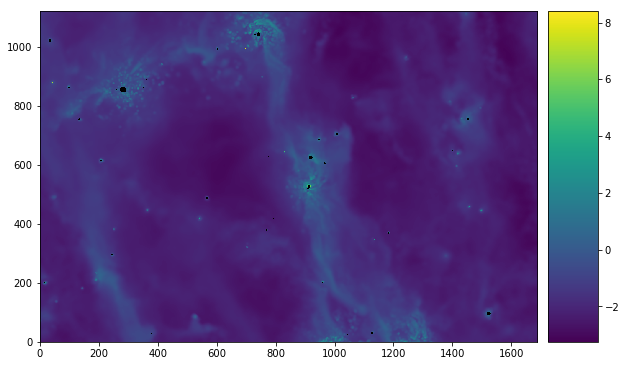

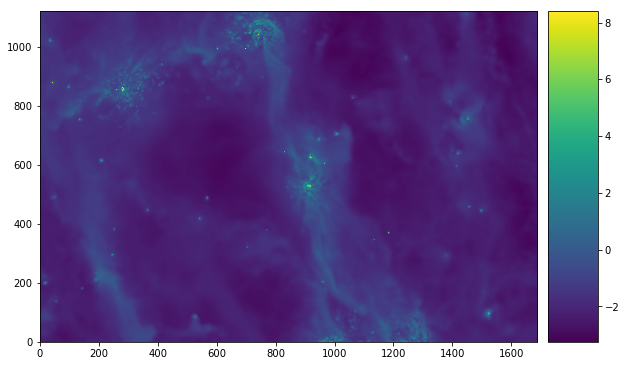

In [46]:
#fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mask_100.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mx_simulation.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(data_FOV_100.T,ax=ax1,colorbar=True)#,bounds=bounds)



standard deviation: 1501376.27561
standard deviation*0.005: 7506.88137806
min value: 104684646.589
median: 104726900.401
sqrt of the median (sig) is: 10233.6161938

standard deviation: 548769.796698
standard deviation*0.005: 2743.84898349
min value: 104684646.589
median: 104726761.941
sqrt of the median (sig) is: 10233.6094288


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


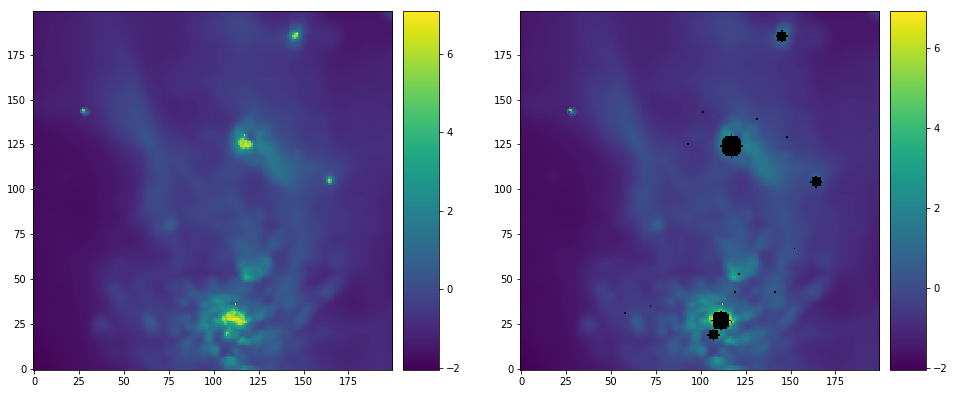

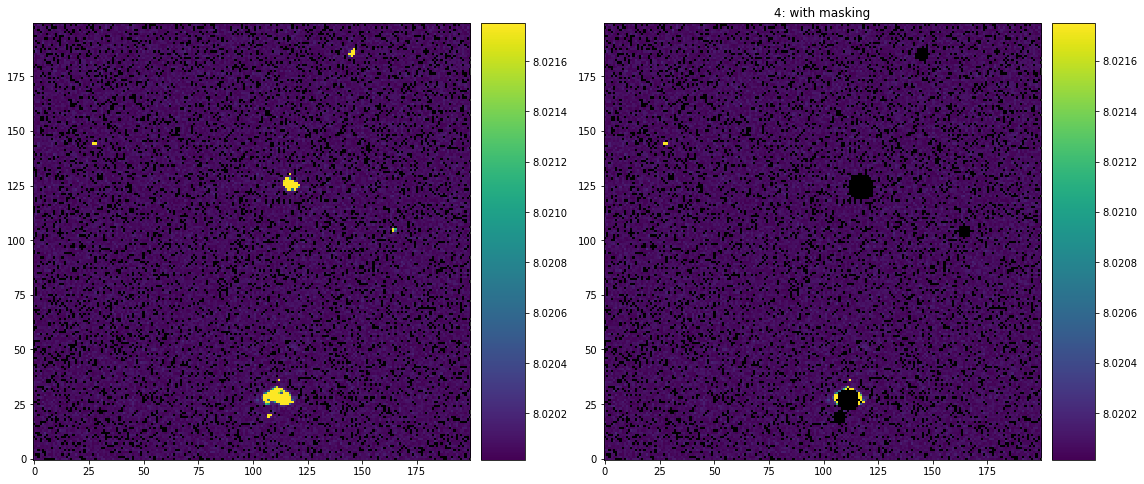

In [50]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(rawsim_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)
plotdata(rawsimmasked_cutout.T,ax=ax2,colorbar=True)#,bounds=bounds)

factor = 1
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(noisemasked_cutout.data, factor, log=False, method = 'average') 
lowres_masked, _mask, _fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax2.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()



standard deviation: 3064935.94552
standard deviation*0.005: 15324.6797276
min value: 104679253.061
median: 104726801.377
sqrt of the median (sig) is: 10233.6113556



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


standard deviation: 2999336.88103
standard deviation*0.005: 14996.6844052
min value: 104679253.061
median: 104726788.972
sqrt of the median (sig) is: 10233.6107495

standard deviation: 1571896.3607
standard deviation*0.005: 7859.48180351
min value: 104701498.02
median: 104726801.955
sqrt of the median (sig) is: 10233.6113838

standard deviation: 1501570.67602
standard deviation*0.005: 7507.85338008
min value: 104701498.02
median: 104726797.284
sqrt of the median (sig) is: 10233.6111556


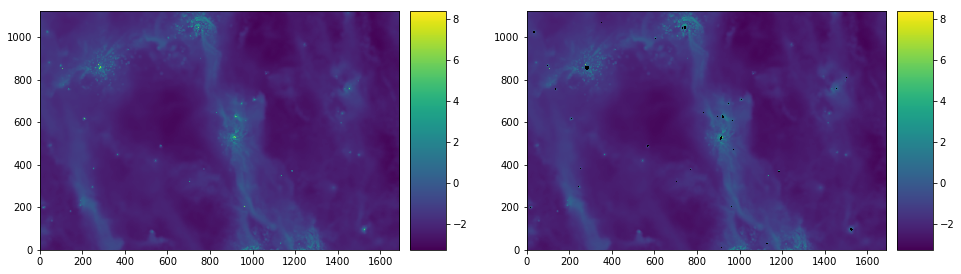

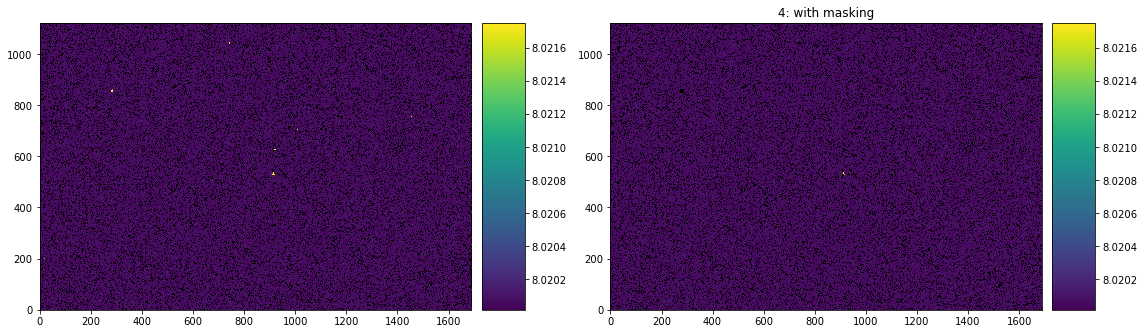

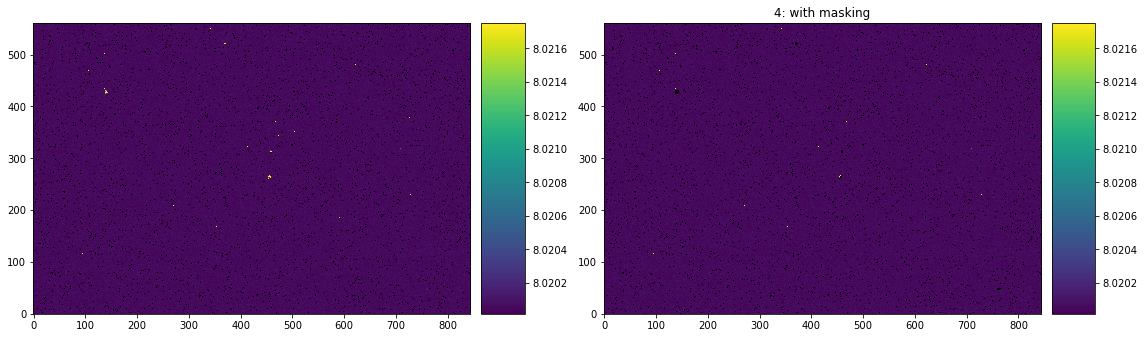

In [52]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(data_FOV_100.T,ax=ax1,colorbar=True)#,bounds=bounds)
plotdata(mx_simulation.T,ax=ax2,colorbar=True)#,bounds=bounds)

factor = 1
lowres = get_halpha_SB.imreduce(mx_noisy.data, factor, log=False, method = 'average') 
lowres_masked, _mask, _fillvalue = imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax2.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 2
lowres = get_halpha_SB.imreduce(mx_noisy.data, factor, log=False, method = 'average') 
lowres_masked, _mask, _fillvalue = imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(clippeddata(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax2.set_title('3: wo masking')
plotdata(clippeddata(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()